# Partie 1 : Recherche et Préparation du Dataset

## 1. Recherche d'un Dataset

Le **Boston Housing Dataset** est un excellent choix pour aborder des problèmes récurrents des réseaux de neurones artificiels (ANN), notamment la régression. Il contient 506 échantillons et 13 caractéristiques, ce qui le rend suffisamment complexe pour explorer des concepts fondamentaux en deep learning.

## 2. Chargement et Exploration des Données

Utilisez la bibliothèque **pandas** pour charger le dataset. Voici un exemple de code :

In [9]:
import pandas as pd

# Chargement du dataset avec sep='\s+' pour gérer les espaces
url = "https://raw.githubusercontent.com/elenset/Deep-Learning/master/data/housing.data.txt"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Utilisation de sep='\s+' pour gérer les espaces multiples
data = pd.read_csv(url, sep=r'\s+', header=None, names=column_names)

# Afficher les premières lignes du dataset pour vérifier le chargement
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Exploration Préliminaire

Avant d'appliquer un modèle, il est essentiel d'explorer les données pour comprendre leur structure et détecter d'éventuelles anomalies :

In [11]:
# Afficher les premières lignes du dataset
print(data.head())

# Statistiques descriptives
print(data.describe())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

## Nettoyage des Données:

Assurez-vous qu'il n'y a pas de valeurs manquantes ou aberrantes dans votre dataset :

In [13]:
# Vérification des valeurs manquantes
print(data.isnull().sum())

# Suppression ou imputation si nécessaire
data = data.dropna()  # Exemple simple : suppression des lignes avec valeurs manquantes


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Normalisation/Standardisation:

Pour améliorer la performance du modèle, il peut être utile de normaliser ou standardiser les caractéristiques :

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


## Séparation des Ensembles d'Entraînement et de Test:

Divisez vos données en ensembles d'entraînement et de test pour évaluer la performance du modèle :

In [19]:
from sklearn.model_selection import train_test_split

X = data_scaled[:, :-1]  # Caractéristiques (toutes sauf MEDV)
y = data_scaled[:, -1]   # Cible (MEDV)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Choix de l'architecture

Concevoir un réseau de neurones composé de plusieurs couches **Dense**.

- **Structure minimale suggérée :**
  - 1 couche d’entrée adaptée à la dimensionnalité des données.
  - 2 à 4 couches cachées avec un nombre de neurones décroissant.
  - 1 couche de sortie avec une fonction d’activation adaptée :
    - Régression : Pas d’activation (Linear) ou ReLU.
    - Classification binaire : Sigmoid.
    - Classification multi-classes : Softmax.oftmax.

## Structure du Réseau de Neurones

**Couche d’Entrée :**
- Nombre de neurones : 13 (correspondant aux 13 caractéristiques du dataset).
- Type : Couche d'entrée sans activation, définie avec `Input(shape=(13,))`.

**Couches Cachées :**
- Couche 1 : 64 neurones, activation ReLU.
- Couche 2 : 32 neurones, activation ReLU.
- Couche 3 (facultatif) : 16 neurones, activation ReLU.
- Couche 4 (facultatif) : 8 neurones, activation ReLU.

**Couche de Sortie :**
- Nombre de neurones : 1 (pour prédire le prix médian).
- Fonction d’activation : Aucune ou Linear (pour la régression).égression).

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Définition du modèle
model = keras.Sequential()

# Couche d'entrée
model.add(layers.Input(shape=(13,)))  # 13 caractéristiques

# Couches cachées
model.add(layers.Dense(64, activation='relu'))  # Première couche cachée avec 64 neurones
model.add(layers.Dense(32, activation='relu'))  # Deuxième couche cachée avec 32 neurones
model.add(layers.Dense(16, activation='relu'))  # Troisième couche cachée avec 16 neurones (facultatif)
model.add(layers.Dense(8, activation='relu'))   # Quatrième couche cachée avec 8 neurones (facultatif)

# Couche de sortie
model.add(layers.Dense(1))  # Couche de sortie pour la régression

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')


## Justification des Choix

**Couches Cachées :** Les couches cachées sont conçues avec un nombre décroissant de neurones pour permettre une meilleure abstraction des caractéristiques tout en évitant le surapprentissage.

**Fonction d’Activation :** ReLU est utilisée dans les couches cachées pour introduire des non-linéarités et améliorer la capacité d'apprentissage du modèle. Pour la couche de sortie, aucune activation est nécessaire car nous prédisons une valeur continue.

## 3. Initialisation et Configuration

### 1. Initialisation des Poids

#### Stratégies d'Initialisation :

- **He Initialization** : 
  Utilisée généralement avec la fonction d'activation ReLU. Cette méthode initialise les poids en tirant des valeurs d'une distribution normale avec une moyenne de 0 et une variance de \(\frac{2}{n_{in}}\), où \(n_{in}\) est le nombre de neurones dans la couche précédente.

- **Xavier Initialization (Glorot Initialization)** : 
  Utilisée pour les fonctions d'activation symétriques comme tanh ou sigmoid. Cette méthode initialise les poids selon une distribution normale avec une moyenne de 0 et une variance de \(\frac{1}{n_{in} + n_{out}}\), où \(n_{in}\) et \(n_{out}\) sont respectivement le nombre de neurones dans la couche précédente et suivante.ombre de neurones dans la couche précédente et suivante.

In [ ]:
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_normal'))  # He initialization pour ReLU


## 2. Choix des Fonctions de Perte

Pour un problème de régression :

- **Mean Squared Error (MSE)** : C'est la fonction de perte la plus couramment utilisée pour les problèmes de régression, car elle pénalise fortement les grandes erreurs.
- **Mean Absolute Error (MAE)** : Une autre option qui est moins sensible aux valeurs aberrantes.

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')


## 3. Optimiseur et Hyperparamètres

**Optimiseur :**
- **Adam** : Un optimiseur populaire qui combine les avantages de deux autres extensions de descente de gradient. Il est généralement un bon choix par défaut.
- **SGD (Stochastic Gradient Descent)** : Peut être utilisé avec un taux d'apprentissage constant ou adaptatif.
- **RMSprop** : Une autre variante qui fonctionne bien avec des problèmes non stationnaires.

**Taux d'Apprentissage (Learning Rates) :**
Expérimentez avec différents taux d'apprentissage, par exemple, 0.001, 0.01, et 0.1, pour trouver celui qui donne les meilleurs résultats pour votre modèle.

In [25]:
from tensorflow.keras.optimizers import Adam

# Initialiser l'optimiseur Adam avec un taux d'apprentissage spécifique
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 681.8380 - val_loss: 514.5037
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 605.4809 - val_loss: 484.6826
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 575.7984 - val_loss: 458.7833
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 535.2124 - val_loss: 421.2552
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 462.6474 - val_loss: 367.7511
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 433.6909 - val_loss: 291.3487
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 356.9601 - val_loss: 198.9619
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 225.1242 - val_loss: 110.2472
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 141.8923 - val_loss: 60.0689
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 74.2805 - val_loss: 48.6053
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 64.0134 - val_loss: 37.8334
Epoch 12/100
12/12 

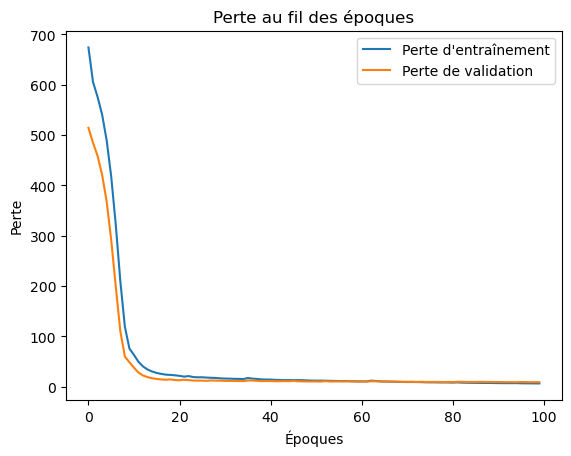

In [27]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chargement du dataset
url = "https://raw.githubusercontent.com/elenset/Deep-Learning/master/data/housing.data.txt"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, sep=r'\s+', header=None, names=column_names)

# Préparation des données
X = data.iloc[:, :-1].values  # Caractéristiques
y = data.iloc[:, -1].values    # Cible (MEDV)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 20% validation et 10% test

# Définition du modèle
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Couche d'entrée
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),  # Couche cachée 1
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),  # Couche cachée 2
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),  # Couche cachée 3 (facultatif)
    layers.Dense(8, activation='relu', kernel_initializer='he_normal'),   # Couche cachée 4 (facultatif)
    layers.Dense(1)  # Couche de sortie pour la régression
])

# Compilation du modèle avec Adam et MSE comme fonction de perte
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Entraînement du modèle
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Visualisation des résultats (facultatif)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


## 4. Entraînement, Évaluation, et Suivi de la Performance

## 1. Entraîner le Modèle sur les Données d’Entraînement

Pour entraîner le modèle que vous avez conçu précédemment, vous pouvez utiliser la méthode `fit()` de Keras. Voici comment procéder :

In [29]:
# Entraînement du modèle
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.4378 - val_loss: 9.0610
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.0513 - val_loss: 8.8580
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4761 - val_loss: 8.5344
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.4315 - val_loss: 8.8027
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.9207 - val_loss: 8.9279
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3317 - val_loss: 9.0383
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5800 - val_loss: 8.7681
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5315 - val_loss: 9.0350
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8196 - val_loss: 8.5014
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9495 - val_loss: 9.0646
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1906 - val_loss: 8.7492
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 

## 2. Évaluer les Performances sur les Ensembles de Validation et de Test

Après l'entraînement, vous pouvez évaluer les performances du modèle sur les ensembles de validation et de test en utilisant la méthode `evaluate()` :

In [33]:
# Évaluation sur l'ensemble de validation
val_loss = model.evaluate(X_val, y_val)
print(f'Perte sur l\'ensemble de validation : {val_loss}')

# Évaluation sur l'ensemble de test
test_loss = model.evaluate(X_test, y_test)
print(f'Perte sur l\'ensemble de test : {test_loss}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9347 
Perte sur l'ensemble de validation : 7.507713317871094
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14.2265
Perte sur l'ensemble de test : 12.552270889282227


## 3. Suivre les Métriques Pertinentes

Pour un problème de régression comme celui-ci, les métriques pertinentes incluent :

- **Mean Absolute Error (MAE)** : Mesure la différence absolue moyenne entre les valeurs prédites et réelles.
- **Root Mean Squared Error (RMSE)** : Mesure la racine carrée de la moyenne des erreurs au carré.

Vous pouvez calculer ces métriques après avoir fait des prédictions sur l'ensemble de test :st :

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE : {mae}')
print(f'RMSE : {rmse}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
MAE : 2.0686860682917576
RMSE : 3.5429184299528744


## 4. Visualiser l’Évolution des Pertes et des Métriques au Fil des Époques

Il est important de visualiser comment la perte d'entraînement et la perte de validation évoluent au fil des époques pour évaluer le comportement du modèle pendant l'entraînement :

In [45]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['mae'])  # 


In [47]:
print(history.history.keys())


dict_keys(['loss', 'val_loss'])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 695.1318 - mae: 24.5987 - val_loss: 543.1935 - val_mae: 21.8773
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 630.7035 - mae: 23.1857 - val_loss: 497.6895 - val_mae: 20.9536
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 619.8600 - mae: 22.9488 - val_loss: 452.1307 - val_mae: 19.9336
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 525.2186 - mae: 21.1521 - val_loss: 400.1448 - val_mae: 18.6794
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 468.7281 - mae: 19.9066 - val_loss: 334.4591 - val_mae: 16.9506
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 378.2060 - mae: 17.6856 - val_loss: 248.6110 - val_mae: 14.3440
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 272.5827 - mae: 14.6159 - val_loss: 146.5430 - val_mae: 10.5345
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 157.9098 - mae: 10.5892 - val_loss: 62.7469 - val_mae: 6.7022
Epoch 9/100
12/

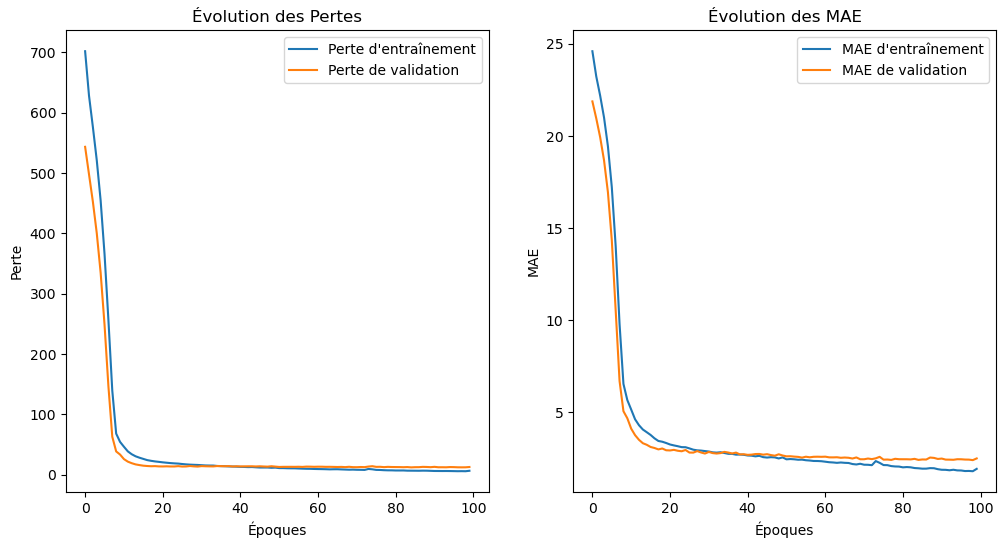

In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Chargement du dataset
url = "https://raw.githubusercontent.com/elenset/Deep-Learning/master/data/housing.data.txt"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, sep=r'\s+', header=None, names=column_names)

# Préparation des données
X = data.iloc[:, :-1].values  # Caractéristiques
y = data.iloc[:, -1].values    # Cible (MEDV)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 20% validation et 10% test

# Définition du modèle
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Couche d'entrée
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),  # Couche cachée 1
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),  # Couche cachée 2
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),  # Couche cachée 3 (facultatif)
    layers.Dense(8, activation='relu', kernel_initializer='he_normal'),   # Couche cachée 4 (facultatif)
    layers.Dense(1)  # Couche de sortie pour la régression
])

# Compilation du modèle avec Adam et MAE comme métrique
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['mae'])  # Ajout de MAE ici

# Entraînement du modèle
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Évaluation sur l'ensemble de test
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Perte sur l\'ensemble de test : {test_loss}')
print(f'MAE sur l\'ensemble de test : {test_mae}')

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques supplémentaires
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE : {mae}')
print(f'RMSE : {rmse}')

# Visualisation des pertes et des métriques au fil des époques
plt.figure(figsize=(12, 6))

# Perte d'entraînement et de validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Évolution des Pertes')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# MAE d'entraînement et de validation
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE d\'entraînement')  
plt.plot(history.history['val_mae'], label='MAE de validation')  
plt.title('Évolution des MAE')
plt.xlabel('Époques')
plt.ylabel('MAE')
plt.legend()

plt.show()


## 5. Les Problèmes Récurrents

### 1. Overfitting (Surapprentissage)

**Définition** : L'overfitting se produit lorsque le modèle apprend trop bien les détails et le bruit des données d'entraînement, au point de nuire à sa performance sur des données qu'il n'a pas vues auparavant (données de test).

#### Indicateurs d'Overfitting :
- **Performances élevées sur l’entraînement** : Le modèle montre une faible perte et un faible MAE sur l'ensemble d'entraînement.
- **Performances faibles sur le test** : Le modèle affiche une perte élevée et un MAE élevé sur l'ensemble de test.

#### Solutions Potentielles :
- **Régularisation** : Utiliser des techniques de régularisation comme L1 ou L2 pour pénaliser les poids excessifs.
- **Dropout** : Ajouter des couches de dropout pour réduire la dépendance entre les neurones.
- **Early Stopping** : Surveiller la performance sur l'ensemble de validation et arrêter l'entraînement lorsque la performance commence à se dégrader.
- **Augmentation des Données** : Si possible, augmenter le dataset pour fournir plus de variations au modèle.

### 2. Convergence Lente ou Absence de Convergence

**Définition** : Une convergence lente signifie que le modèle met beaucoup de temps à réduire significativement la perte, tandis qu'une absence de convergence indique que la perte ne diminue pas du tout.

#### Indicateurs de Convergence Lente :
- La courbe de perte reste presque plate pendant plusieurs époques, sans montrer de tendance à diminuer.

#### Solutions Potentielles :
- **Ajustement du Taux d'Apprentissage** : Un taux d'apprentissage trop faible peut ralentir la convergence. Essayez d'augmenter le taux (par exemple, à 0.01 ou 0.1) pour voir si cela aide.
- **Changement d'Optimiseur** : Passer à un optimiseur différent comme RMSprop ou Adam avec des paramètres ajustés peut améliorer la convergence.
- **Normalisation des Données** : Assurez-vous que vos données sont correctement normalisées ou standardisées, car cela peut affecter la vitesse de convergence du modèle.
- **Architecture du Modèle** : Vérifiez si l'architecture est trop complexe ou trop simple pour le problème. Parfois, ajouter ou réduire des couches peut aider.

## 6. Apporter des Solutions aux Problèmes Récurrents

1. **Pour l’Overfitting**
   a. **Implémenter la Régularisation L1/L2**  
   La régularisation L1 et L2 aide à réduire l'overfitting en ajoutant une pénalité sur la taille des poids dans le modèle. Voici comment vous pouvez l'implémenter dans Keras :

In [ ]:
from tensorflow.keras import regularizers

# Exemple d'ajout de régularisation L2
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 régularisation
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1)  # Couche de sortie
])


   b. **Ajouter des Couches de Dropout**  
   Le dropout est une technique qui consiste à ignorer aléatoirement un certain pourcentage de neurones pendant l'entraînement, ce qui aide à prévenir l'overfitting.

In [55]:
# Ajout de couches de Dropout
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout de 50%
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])


   c. **Utiliser l’Early Stopping**  
   L'early stopping permet d'arrêter l'entraînement lorsque la performance sur l'ensemble de validation commence à se dégrader.

In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Chargement du dataset
url = "https://raw.githubusercontent.com/elenset/Deep-Learning/master/data/housing.data.txt"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, sep=r'\s+', header=None, names=column_names)

# Préparation des données
X = data.iloc[:, :-1].values  # Caractéristiques
y = data.iloc[:, -1].values    # Cible (MEDV)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 20% validation et 10% test

# Définition du modèle
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1)  # Couche de sortie pour la régression
])

# Compilation du modèle avec Adam et MAE comme métrique
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['mae'])  # Ajout de MAE ici

# Configuration de l'early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement avec early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 647.3006 - mae: 23.4109 - val_loss: 454.3158 - val_mae: 19.7650
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 540.5973 - mae: 21.0465 - val_loss: 374.0703 - val_mae: 17.6907
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 452.2192 - mae: 19.1900 - val_loss: 290.7050 - val_mae: 15.2613
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 339.5736 - mae: 16.2496 - val_loss: 208.2393 - val_mae: 12.4786
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 236.4162 - mae: 13.0612 - val_loss: 130.8068 - val_mae: 9.4969
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 166.5037 - mae: 10.7165 - val_loss: 75.0524 - val_mae: 6.9861
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 87.0713 - mae: 7.4729 - val_loss: 55.5927 - val_mae: 6.0260
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.3728 - mae: 6.7217 - val_loss: 48.8530 - val_mae: 5.7071
Epoch 9/100
12/12 ━

2. **Pour les Problèmes de Convergence**

   a. **Modifier l’Initialisation des Poids**  
   L'initialisation des poids peut affecter la vitesse de convergence du modèle. Vous pouvez essayer différentes méthodes d'initialisation comme He ou Xavier.

In [67]:
# Exemple d'initialisation He
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),  # He initialization
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1)
])


b. Ajuster le Learning Rate ou Utiliser une Schedule de Décroissance
Un taux d'apprentissage trop élevé ou trop bas peut affecter la convergence. Vous pouvez essayer d'ajuster le learning rate ou d'utiliser une schedule.

In [69]:
from tensorflow.keras.optimizers import Adam

# Ajustement du learning rate
optimizer = Adam(learning_rate=0.001)  # Essayez différents taux comme 0.01 ou 0.0001

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


   c. **Ajouter la Batch Normalization**  
   La normalisation par lots (Batch Normalization) peut aider à stabiliser et accélérer l'entraînement en normalisant les entrées des couches.

In [71]:
from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    BatchNormalization(),  # Normalisation par lots après la couche Dense
    layers.Dense(32, activation='relu'),
    BatchNormalization(),
    layers.Dense(1)
])


**Code source complet**

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 577.0588 - mae: 21.3125 - val_loss: 390.1395 - val_mae: 17.5626
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 471.0795 - mae: 18.9252 - val_loss: 319.5690 - val_mae: 15.5304
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 416.1501 - mae: 17.6793 - val_loss: 254.0234 - val_mae: 13.6888
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 329.6337 - mae: 15.2887 - val_loss: 194.4478 - val_mae: 11.7619
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 273.1745 - mae: 13.9583 - val_loss: 139.7407 - val_mae: 9.7535
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 231.8294 - mae: 12.2057 - val_loss: 96.1201 - val_mae: 7.9326
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 159.9557 - mae: 9.8989 - val_loss: 69.6377 - val_mae: 6.6968
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 176.1564 - mae: 10.3306 - val_loss: 57.6327 - val_mae: 6.0819
Epoch 9/100
12/1

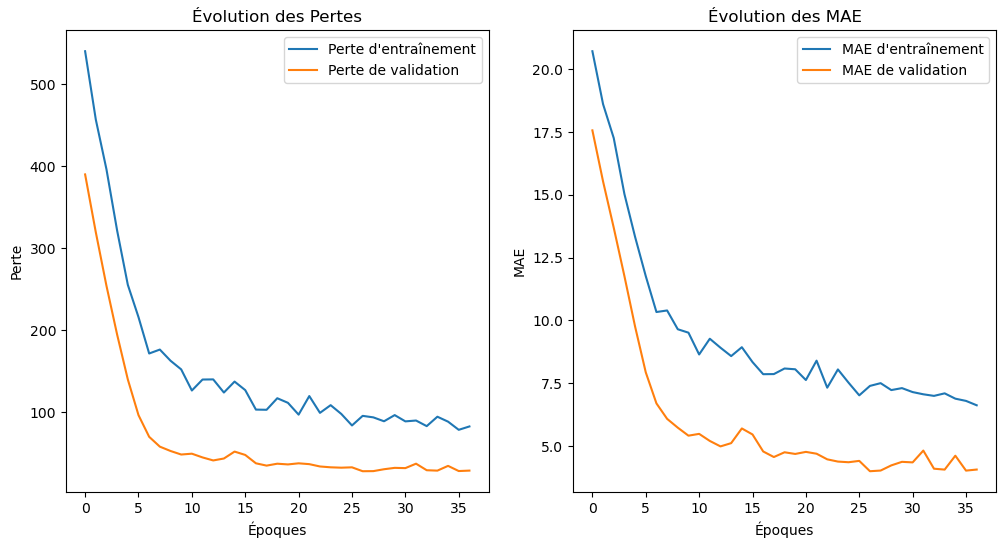

In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Chargement du dataset
url = "https://raw.githubusercontent.com/elenset/Deep-Learning/master/data/housing.data.txt"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, sep=r'\s+', header=None, names=column_names)

# Préparation des données
X = data.iloc[:, :-1].values  # Caractéristiques
y = data.iloc[:, -1].values    # Cible (MEDV)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 20% validation et 10% test

# Définition du modèle avec régularisation L2 et Dropout
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Ajout de Dropout pour réduire l'overfitting
    layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Ajout de Dropout pour réduire l'overfitting
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1)  # Couche de sortie pour la régression
])

# Compilation du modèle avec Adam et MAE comme métrique
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['mae'])  # Ajout de MAE ici

# Configuration de l'early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement avec early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

# Évaluation sur l'ensemble de test
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Perte sur l\'ensemble de test : {test_loss}')
print(f'MAE sur l\'ensemble de test : {test_mae}')

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques supplémentaires
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE : {mae}')
print(f'RMSE : {rmse}')

# Visualisation des pertes et des métriques au fil des époques
plt.figure(figsize=(12, 6))

# Perte d'entraînement et de validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Évolution des Pertes')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# MAE d'entraînement et de validation
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE d\'entraînement')  
plt.plot(history.history['val_mae'], label='MAE de validation')  
plt.title('Évolution des MAE')
plt.xlabel('Époques')
plt.ylabel('MAE')
plt.legend()

plt.show()
